<h1> ********************************* Time Series********************************************* </h1>

<h2> time series </h2> : sequence of datapoints organized in time order, captured at equally spaced time points (days/weeks etc)
 data collected irregularly is not considered as time series 
 Presence of time variable
 predicting an event, as a function of time, until that event happens

 data is going to be correlated over time (what happens in the prior period has an impact on what happens next)
 so if we make one wrong prediction, that can affect next future predictions as well 
 (as it will have an impact on future predictions as well)
 so to make a prediction, we use feature from that time frame, and from previous time frames 

<h2> data stationarity </h2> : data without seasonal fluctions or trends 

 time series forecasting requires large amounts of data to perform well 

 better forecast, results in better buz. performance
 good data is very important; good = concreate and full 


 if we are using price to forecast sales, then to make a prediction in future we will also need price
 if price in NA, then we need a way to forecast that as well 

<h2> forecasting evaluation </h2> is tricky as standard metrics are misleading 
 e.g., which forecast miss to look at ? what is forecast objective ? looking at compound errors 
 MAPE can be looked at , but can be misleading, as if the actual value is too high, then the error may be underrepresented

 e.g, predict sales to ensure you have enough inventory 
 its more costly to have less inventory , as compared to having more 
 so you have to tune your error so that its better to have more inventory and make an over-forecast 


<h2> Forecasting Problems</h2> : Univariate (e.g., only forecasting sales)
 Panel/Multivariate (e.g., forecasting sales wrt price), multiple related series 

<h2> combining forecasts </h2>
 so instead of forecasting revenue 
 rev fc = price/unit fc * unit/customer * #customers
 loan fc = #defaults * loss/default * $exposure 
 total network traffic = traffic/node * #active nodes 

 but what is better, individual forecasting or single series forecasting 


<h2> Applications </h2>
 finance : stock prices, asset prices , macroeconomic factors etc 
 e-commerce : page views, new users etc
 business : transactions, revenue, inventory levels 
 insight and anomaly detection 

<h1> the whole point is to anticipate events that require management intervention  </h1>



<h2> date time object </h2>
datetime64 object - numpy date time format - [ns] = nanoseconds, [D] = Day, [M] = Month 
 timedelta64 object - numpy time interval format 
 datetimeindex - used to represent timeseries data 

In [3]:
# task 
# read data
# group by on order_date,  category, and sum sales 
# check datatypes 
# set datetime as index - this can be used to get subset e.g., base['2011-2'] returns rows for feb 2011
# or base['2011':'2012-2'] 
# base.index.day, .week, .dayofweek 
# duplicates needs to be removed 
# make sure there are no missing index values 
# pivot : index = datetime , columns= category ; removes duplicates 
# fill na (zero)
# check if there are missing dates 
# pd.date_range(min to max)
# replace index (reindex, and check frequency 

# upsampling : changing frequency from days to weeks , weeks to months (sales.resample('W').sum())
# upsample to W, M, Q, Y
# downsampling is inverse (fills missing values using interpolation)

# variable transformation : log transfroms, differences, growth rate, percentage change etc. 
# rolling average and windows 

# plotting: .plot() line plot 
# acp autocorrelation, pacf partial autocorrelation : correlation between one period and the next 
# https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/
# seasonal monthly and quaterly plot 



<h1> Imports </h1>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display 
from datetime import datetime 
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

<h1> PreProcessing </h1>

In [33]:
# read data
data=pd.read_excel('week_1_data/Sample - Superstore.xls')
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [34]:
# selecting data subset
base_data=data.groupby(['Order Date','Category'],as_index=False).agg(Sale_Count=('Sales','sum'))
display(base_data.head())
base_data.info()

,Order Date,Category,Sale_Count
0,2011-01-04,Office Supplies,16.448
1,2011-01-05,Office Supplies,288.060
2,2011-01-06,Office Supplies,19.536
3,2011-01-07,Furniture,2573.820
4,2011-01-07,Office Supplies,685.340


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2864 non-null   datetime64[ns]
 1   Category    2864 non-null   object        
 2   Sale_Count  2864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.2+ KB


In [35]:
#numpy dates 
dates=np.array(base_data['Order Date'],dtype='datetime64[D]')
dates

array(['2011-01-04', '2011-01-05', '2011-01-06', ..., '2014-12-31',
       '2014-12-31', '2014-12-31'], dtype='datetime64[D]')

In [36]:
# setting index
base_data.set_index('Order Date',inplace=True)
base_data.head()

,Category,Sale_Count
Order Date,,
2011-01-04,Office Supplies,16.448
2011-01-05,Office Supplies,288.060
2011-01-06,Office Supplies,19.536
2011-01-07,Furniture,2573.820
2011-01-07,Office Supplies,685.340


In [41]:
# subset data based on date index

display(base_data['2011'].head())

display(base_data[base_data['Category']=='Furniture']['2011-2':'2011-3'])

C:\Users\umar.khan2\AppData\Local\Temp\ipykernel_4176\415842678.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  display(base_data['2011'].head())


,Category,Sale_Count
Order Date,,
2011-01-04,Office Supplies,16.448
2011-01-05,Office Supplies,288.060
2011-01-06,Office Supplies,19.536
2011-01-07,Furniture,2573.820
2011-01-07,Office Supplies,685.340


,Category,Sale_Count
Order Date,,
2011-02-01,Furniture,290.666
2011-02-09,Furniture,14.560
2011-02-12,Furniture,1650.050
2011-02-13,Furniture,129.568
2011-02-19,Furniture,25.160
2011-02-21,Furniture,20.320
2011-03-01,Furniture,1893.995
2011-03-03,Furniture,928.802
2011-03-07,Furniture,966.984


In [47]:
# base date components 

print(base_data.index.day)
print(base_data.index.isocalendar().week)
print(base_data.index.dayofweek)

Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864)
Order Date
2011-01-04    1
2011-01-05    1
2011-01-06    1
2011-01-07    1
2011-01-07    1
             ..
2014-12-30    1
2014-12-30    1
2014-12-31    1
2014-12-31    1
2014-12-31    1
Name: week, Length: 2864, dtype: UInt32
Int64Index([1, 2, 3, 4, 4, 4, 5, 5, 0, 0,
            ...
            6, 0, 0, 0, 1, 1, 1, 2, 2, 2],
           dtype='int64', name='Order Date', length=2864)


In [50]:
# pivot to remove duplicate index values (as same date will have a value for each of cateogory)
# base_data.reset_index(inplace=True)

data_pivot=base_data.pivot(index='Order Date',columns='Category',values='Sale_Count')
data_pivot.head()

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,NaN,16.448,NaN
2011-01-05,NaN,288.060,NaN
2011-01-06,NaN,19.536,NaN
2011-01-07,2573.820,685.340,1147.94
2011-01-08,76.728,10.430,NaN


In [62]:
print('unique value in base date :',len(base_data['Order Date'].unique()))
print('we have :', len(base_data), 'i.e., repitition of dates')
print('total values should be :',base_data['Order Date'].max()-base_data['Order Date'].min(),'ie we have missing dates')

unique value in base date : 1238
we have : 2864 i.e., repitition of dates
total values should be : 1457 days 00:00:00 ie we have missing dates


In [65]:
print('unique value in base date :',len(data_pivot.index.unique()))
print('we have :', len(data_pivot), 'i.e., repitition removed using pivot')
print('total values should be :',data_pivot.index.max()-data_pivot.index.min(),'ie we have missing dates')

unique value in base date : 1238
we have : 1238 i.e., repitition removed using pivot
total values should be : 1457 days 00:00:00 ie we have missing dates


In [69]:
rs_data_pivot=data_pivot.asfreq('D')

print('unique value in base date :',len(rs_data_pivot.index.unique()))
print('we have :', len(rs_data_pivot), 'i.e., repitition removed using pivot')
print('total values should be :',rs_data_pivot.index.max()-rs_data_pivot.index.min(),'ie missing values catered with NA')


unique value in base date : 1458
we have : 1458 i.e., repitition removed using pivot
total values should be : 1457 days 00:00:00 ie missing values catered with NA


In [82]:
rs_data_pivot.fillna(0,inplace=True)

In [77]:
# variable transformations e.g., percentage change (time series wise)

monthly_sales=data_pivot.asfreq('M')
monthly_sales.fillna(0.00001,inplace=True)
monthly_sales.head()
pct_chng=monthly_sales.pct_change()

monthly_trans=monthly_sales.merge(pct_chng,left_index=True,right_index=True,how='left')
monthly_trans.head()

Category,Furniture_x,Office Supplies_x,Technology_x,Furniture_y,Office Supplies_y,Technology_y
Order Date,,,,,,
2011-01-31,0.00001,240.50000,0.00001,NaN,NaN,NaN
2011-02-28,0.00001,19.45600,0.00001,0.0,-0.919102,0.000000e+00
2011-03-31,1125.48800,754.08000,79.98400,112548799.0,37.758224,7.998399e+06
2011-04-30,0.00001,1000.95000,47.79000,-1.0,0.327379,-4.025055e-01
2011-05-31,0.00001,0.00001,773.70000,0.0,-1.000000,1.518958e+01


In [89]:
# rolling window based functions 

window_size=7

rol_wind=rs_data_pivot.rolling(window_size)
print(rol_wind.mean().dropna())
print(rol_wind.sum().dropna())
print(rs_data_pivot.cumsum().dropna())

Category      Furniture  Office Supplies  Technology
Order Date                                          
2011-01-10   378.649714       147.022571  168.448571
2011-01-11   386.069714       145.085714  168.448571
2011-01-12   387.489714       103.934286  168.448571
2011-01-13   387.489714       101.143429  168.448571
2011-01-14   145.506714       292.825714   96.848571
...                 ...              ...         ...
2014-12-27   944.348286      1272.969714  873.260286
2014-12-28   944.348286      1220.900000  896.744286
2014-12-29  1020.824971      1123.642000  848.441429
2014-12-30   770.005257       899.445857  676.816286
2014-12-31   775.865543       778.021857  619.096286

[1452 rows x 3 columns]
Category    Furniture  Office Supplies  Technology
Order Date                                        
2011-01-10  2650.5480         1029.158    1179.140
2011-01-11  2702.4880         1015.600    1179.140
2011-01-12  2712.4280          727.540    1179.140
2011-01-13  2712.4280          

In [83]:
rs_data_pivot

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.0000,16.448,0.000
2011-01-05,0.0000,288.060,0.000
2011-01-06,0.0000,19.536,0.000
2011-01-07,2573.8200,685.340,1147.940
2011-01-08,76.7280,10.430,0.000
...,...,...,...
2014-12-27,0.0000,814.594,0.000
2014-12-28,0.0000,13.248,164.388
2014-12-29,551.2568,1091.244,14.850


<AxesSubplot:title={'center':'rolling avg (7 size) of daily sales'}, xlabel='Order Date'>

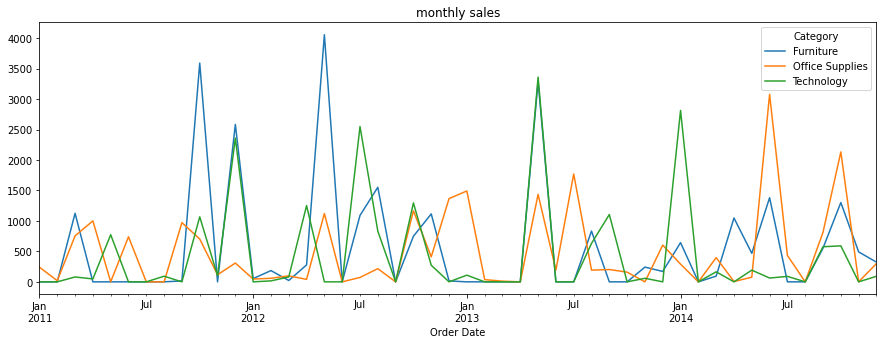

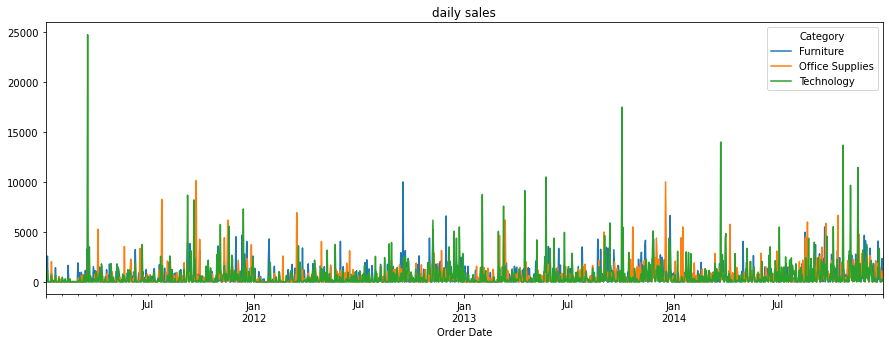

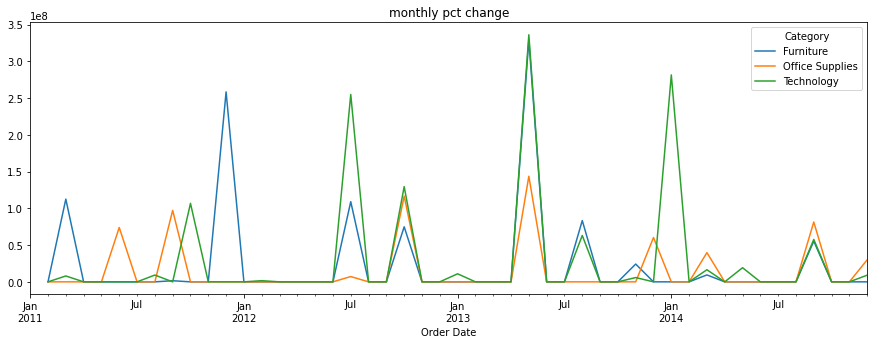

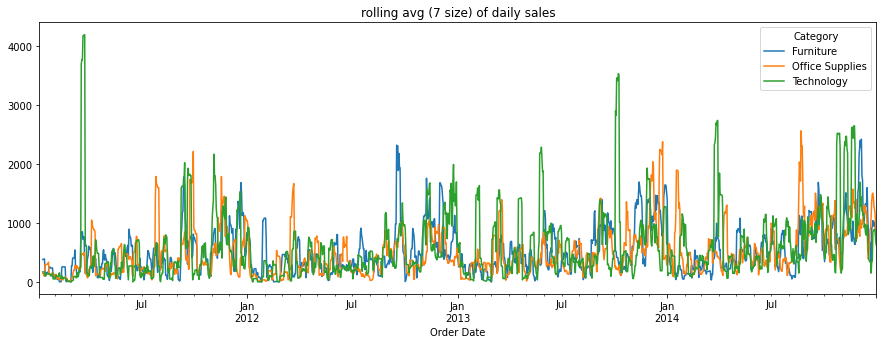

In [96]:
#visuals

monthly_sales.plot(figsize=(15,5),title='monthly sales')
rs_data_pivot.plot(figsize=(15,5),title='daily sales')
monthly_sales.pct_change().plot(figsize=(15,5),title='monthly pct change')
rol_wind.mean().plot(figsize=(15,5),title='rolling avg (7 size) of daily sales')

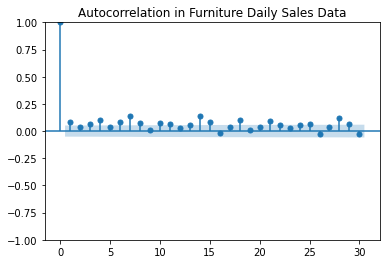

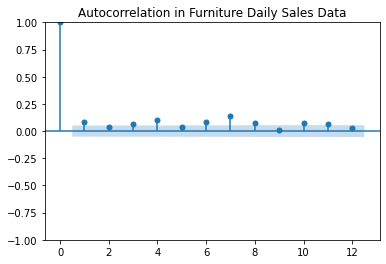

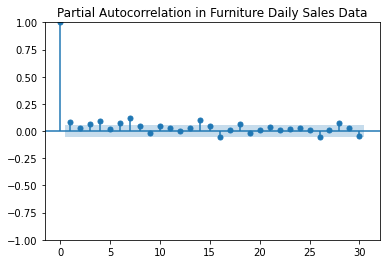

In [100]:
acf_plot = plot_acf(rs_data_pivot['Furniture'], lags=30, title='Autocorrelation in Furniture Daily Sales Data')

acf_plot = plot_acf(rs_data_pivot['Furniture'], lags=12, title='Autocorrelation in Furniture Daily Sales Data')

pacf_plot = plot_pacf(rs_data_pivot['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')


Monthly Data Seasonal Plot


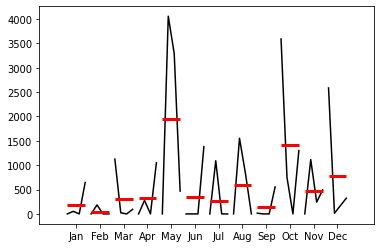

In [101]:
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(monthly_sales['Furniture'])

In [111]:
monthly_sales[monthly_sales.index.month==10]['Furniture']

Order Date
2011-10-31    3591.03200
2012-10-31     748.96900
2013-10-31       0.00001
2014-10-31    1301.75800
Freq: 12M, Name: Furniture, dtype: float64